<a href="https://colab.research.google.com/github/VaibhavTiwa/Pyspark/blob/main/YouTube_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [561]:
!pip install pyspark


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [562]:
from pyspark.sql import *
spark=SparkSession.builder.master('local[*]').appName('YouTube').getOrCreate()

In [563]:
DataFrame1=spark.read.csv('/content/videos-stats.csv',header=True,inferSchema=True)
DataFrame2=spark.read.csv('/content/comments.csv',header=True,inferSchema=True)


In [564]:
DataFrame2.select('Comment','_c0').show()
DataFrame1.show(2)



+--------------------+--------------+
|             Comment|           _c0|
+--------------------+--------------+
|Let's not forget ...|             0|
|Here in NZ 50% of...|             1|
|I will forever ac...|             2|
|Whenever I go to ...|             3|
|Apple Pay is so c...|             4|
|We’ve been houndi...|             5|
|We only got Apple...|             6|
|For now, I need b...|             7|
|In the United Sta...|             8|
|In Cambodia, we h...|             9|
|Wow, you really w...|            10|
|The lab is the mo...|            11|
|Linus, I'm an eng...|            12|
|There used to be ...|            13|
|Holy crap. I was ...|            14|
|I love the direct...|            15|
|I am more excited...|            16|
|I adore the worki...|            17|
|LMGs growth is ho...|            18|
| engineering orie...|More technical|
+--------------------+--------------+
only showing top 20 rows

+---+--------------------+-----------+------------+-------+---

# **FORGEIN KEY BETWEEN THESE TWO DATSET IS VIDEO ID**
# **▶**

In [565]:
#CLEANING OF THE DATASET 
print(DataFrame2.count())
print(DataFrame1.count())

df1=DataFrame1.dropna(how='any')
print(df1.count())
df2=DataFrame2.dropna(how='any')
print(df2.count())

30036
1881
1879
16077


In [566]:
df1.printSchema()
df2.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Title: string (nullable = true)
 |-- Video ID: string (nullable = true)
 |-- Published At: date (nullable = true)
 |-- Keyword: string (nullable = true)
 |-- Likes: double (nullable = true)
 |-- Comments: double (nullable = true)
 |-- Views: double (nullable = true)

root
 |-- _c0: string (nullable = true)
 |-- Video ID: string (nullable = true)
 |-- Comment: string (nullable = true)
 |-- Likes: string (nullable = true)
 |-- Sentiment: string (nullable = true)



In [567]:
# we will cast our likes column to int
from pyspark.sql.functions import col
from pyspark.sql.types import IntegerType
df4=df2.withColumn('Likes',col('Likes').cast(IntegerType()))\
      .withColumn('_c0',col('_c0').cast(IntegerType()))
df4.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Video ID: string (nullable = true)
 |-- Comment: string (nullable = true)
 |-- Likes: integer (nullable = true)
 |-- Sentiment: string (nullable = true)



In [568]:
from pyspark.sql.window import Window
from pyspark.sql.functions import row_number
window_spec=Window.orderBy('_c0')
df6=df4.withColumn('R_id',row_number().over(window_spec))
df6=df6.drop('_c0')
df6.select('R_id','Video ID').show(10)
df1.show()


+----+--------------------+
|R_id|            Video ID|
+----+--------------------+
|   1|            in depth|
|   2| the main issue w...|
|   3|         for indoors|
|   4| I hope you achie...|
|   5|              Tracey|
|   6| you are free to ...|
|   7|          highschool|
|   8|                yeah|
|   9| otherwise I woul...|
|  10|              Google|
+----+--------------------+
only showing top 10 rows

+---+--------------------+-----------+------------+-------+--------+--------+-----------+
|_c0|               Title|   Video ID|Published At|Keyword|   Likes|Comments|      Views|
+---+--------------------+-----------+------------+-------+--------+--------+-----------+
|  0|Apple Pay Is Kill...|wAZZ-UWGVHI|  2022-08-23|   tech|  3407.0|   672.0|   135612.0|
|  1|The most EXPENSIV...|b3x28s61q3c|  2022-08-24|   tech| 76779.0|  4306.0|  1758063.0|
|  2|My New House Gami...|4mgePWWCAmA|  2022-08-23|   tech| 63825.0|  3338.0|  1564007.0|
|  3|Petrol Vs Liquid ...|kXiYSI7H2b0|  20

In [569]:
df1=df1.withColumnRenamed('_c0','R_id')\
       .withColumnRenamed('Likes','Liked')\
       .withColumnRenamed('Published At','Published')\
       .withColumnRenamed('Video ID','VID')\
       .withColumnRenamed('Comments','Total_Comment')





# ***WE WILL DO JOIN OF BOTH THE TABLE***
# ✅

In [570]:
print('now first we will join these two table and we will create a new table ')
# join_condition = df1["common_column"] == df2["common_column"]

# # Perform the full outer join
# joined_df = df1.join(df2, join_condition, "left")
#grouped_df = joined_df.groupBy("column_to_group_by").agg(<aggregation_expression>)
from pyspark.sql.functions import collect_list

now first we will join these two table and we will create a new table 


In [571]:
df16=df1['VID']==df6['Video ID']
dataframe=df1.join(df2,df16,'left')
dataframe1=dataframe.drop('_c0','Video ID')

dataframe1.show()

+----+--------------------+-----------+----------+-------+-------+-------------+---------+--------------------+------+---------+
|R_id|               Title|        VID| Published|Keyword|  Liked|Total_Comment|    Views|             Comment| Likes|Sentiment|
+----+--------------------+-----------+----------+-------+-------+-------------+---------+--------------------+------+---------+
|   0|Apple Pay Is Kill...|wAZZ-UWGVHI|2022-08-23|   tech| 3407.0|        672.0| 135612.0|In Cambodia, we h...|  28.0|      1.0|
|   0|Apple Pay Is Kill...|wAZZ-UWGVHI|2022-08-23|   tech| 3407.0|        672.0| 135612.0|In the United Sta...|   2.0|      2.0|
|   0|Apple Pay Is Kill...|wAZZ-UWGVHI|2022-08-23|   tech| 3407.0|        672.0| 135612.0|For now, I need b...|   7.0|      1.0|
|   0|Apple Pay Is Kill...|wAZZ-UWGVHI|2022-08-23|   tech| 3407.0|        672.0| 135612.0|We only got Apple...|  29.0|      2.0|
|   0|Apple Pay Is Kill...|wAZZ-UWGVHI|2022-08-23|   tech| 3407.0|        672.0| 135612.0|We’ve b

In [572]:
from pyspark.sql.functions import collect_list,explode,first
from pyspark.sql import SQLContext
#dataframe2=dataframe1.groupBy('R_id').agg(collect_list('Comment').alias('Comment'))
#dataframe2=dataframe2.select('R_id', explode('Comment').alias('Comment'))
dataframe2 =dataframe1.groupBy('R_id').agg(
    
    collect_list('Comment').alias('Comment'),
   
)


In [573]:

# df16=df1['VID']==df6['Video ID']
# dataframe=df1.join(df2,df16,'left')
dataframe12=dataframe1['R_id']==dataframe2['R_id']
data=df1.join(dataframe2,dataframe12,'inner')
data.show(truncate=False)

+----+--------------------------------------------------------------------------------------------------+-----------+----------+-------+--------+-------------+-----------+----+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [574]:
data.createOrReplaceTempView('table')
data=(""" 
        select Title,VID,Comment,Liked,Views,Keyword from table 
        order by Views desc,  Liked desc

""")
result=spark.sql(data)


In [575]:
result.createOrReplaceTempView('table1')

data1=('''
         select max(Liked) as Most_Liked,Title,Views,Keyword,VID from table1
         group by Title,Views,Keyword,VID 

''')

result1=spark.sql(data1)
result1.show()

+----------+--------------------+----------+-------------+-----------+
|Most_Liked|               Title|     Views|      Keyword|        VID|
+----------+--------------------+----------+-------------+-----------+
|   76779.0|The most EXPENSIV...| 1758063.0|         tech|b3x28s61q3c|
|    2385.0|Najib ke penjara,...|  288722.0|         news|B0ga0OUkb9c|
|   14899.0|Craziest &quot;De...| 1836457.0|       sports|U7bNzl0HepU|
|    4706.0|Forget the iPhone...|  164331.0|        apple|GAyMEqZZxWA|
|  274209.0|iOS 16 Hands-On: ...| 7544821.0|        apple|WfVF-Ec4naQ|
|    2229.0|Most EVIL Kings i...|   70762.0|      history|BRXE6R8FYw4|
|  153762.0|I GIRL Voice Trol...| 4364168.0|     trolling|pKum_Y4mXRk|
|   75028.0|What the Chaga Tr...| 4695664.0|         food|sZ12W9uqxR4|
|    8560.0|TESTING Viral Min...|  107957.0|    minecraft|9G0t1bJEP4g|
|    3407.0|Apple Pay Is Kill...|  135612.0|         tech|wAZZ-UWGVHI|
|     539.0|20 हजार रोज कमाकर...|   23819.0|     business|XnJ9KckzQEU|
|    5

In [576]:
result1.createOrReplaceTempView('table2')

data2=('''
        WITH CTE AS(



         select dense_rank() over(order by Keyword desc)as MOST_SEARCHED_KEYWORD,Keyword from table2
         group by keyword
         
         )
           SELECT Keyword from CTE 
           order by  MOST_SEARCHED_KEYWORD asc
       
       
      
      
    
        

''')

result2=spark.sql(data2)
result2.show()

+----------------+
|         Keyword|
+----------------+
|            xbox|
|        tutorial|
|        trolling|
|            tech|
|          sports|
|             sat|
|        reaction|
|         physics|
|        nintendo|
|            news|
|           music|
|         mukbang|
|         mrbeast|
|          movies|
|       minecraft|
|   mathchemistry|
|          marvel|
|machine learning|
|            lofi|
|      literature|
+----------------+
only showing top 20 rows



In [579]:
!pip install matplotlib
!pip install pandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


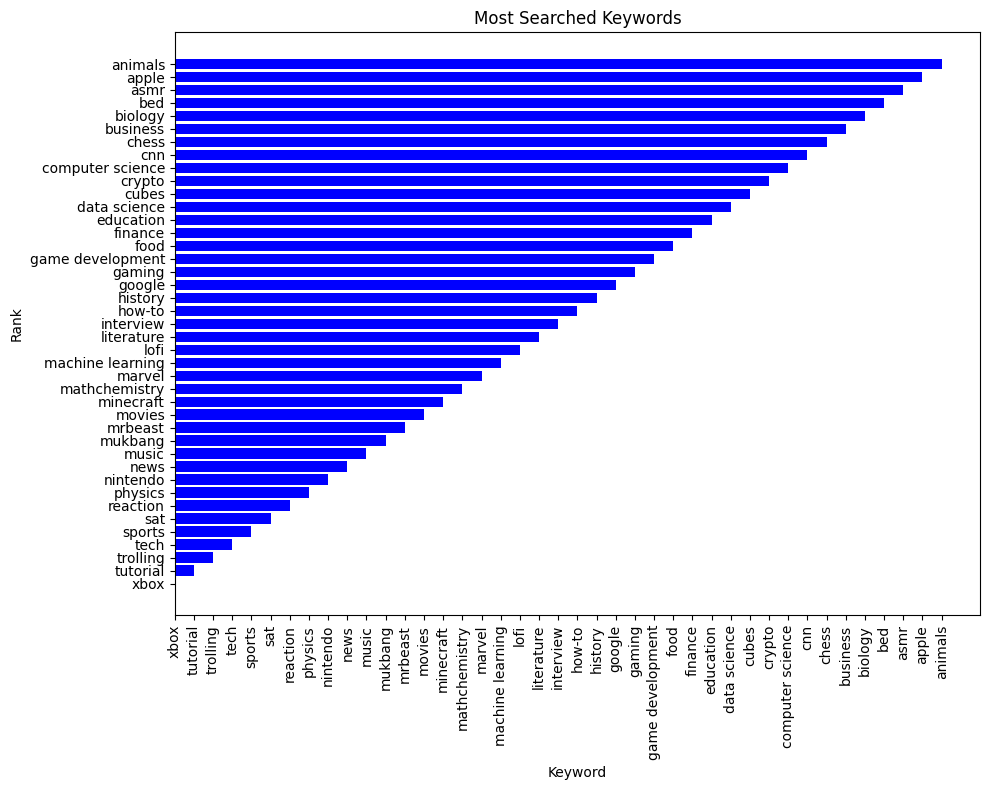

In [583]:
import matplotlib.pyplot as plt

# Extract the keywords and convert them to a list
keywords = [row.Keyword for row in result2.collect()]

# Create a list of ranks for the y-axis
ranks = list(range(1, len(keywords) + 1))

# Plotting the bar chart
plt.figure(figsize=(10, 8))  # Adjust the figure size as per your preference
plt.barh(ranks, keywords, color='blue')
plt.xlabel('Keyword')
plt.ylabel('Rank')
plt.title('Most Searched Keywords')
plt.yticks(ranks, keywords)  # Set the y-axis ticks to the keywords
plt.xticks(rotation=90)  # Rotate the labels on the x-axis by 90 degrees
plt.tight_layout()
plt.show()


<ipython-input-595-3ac01c057f6b>:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


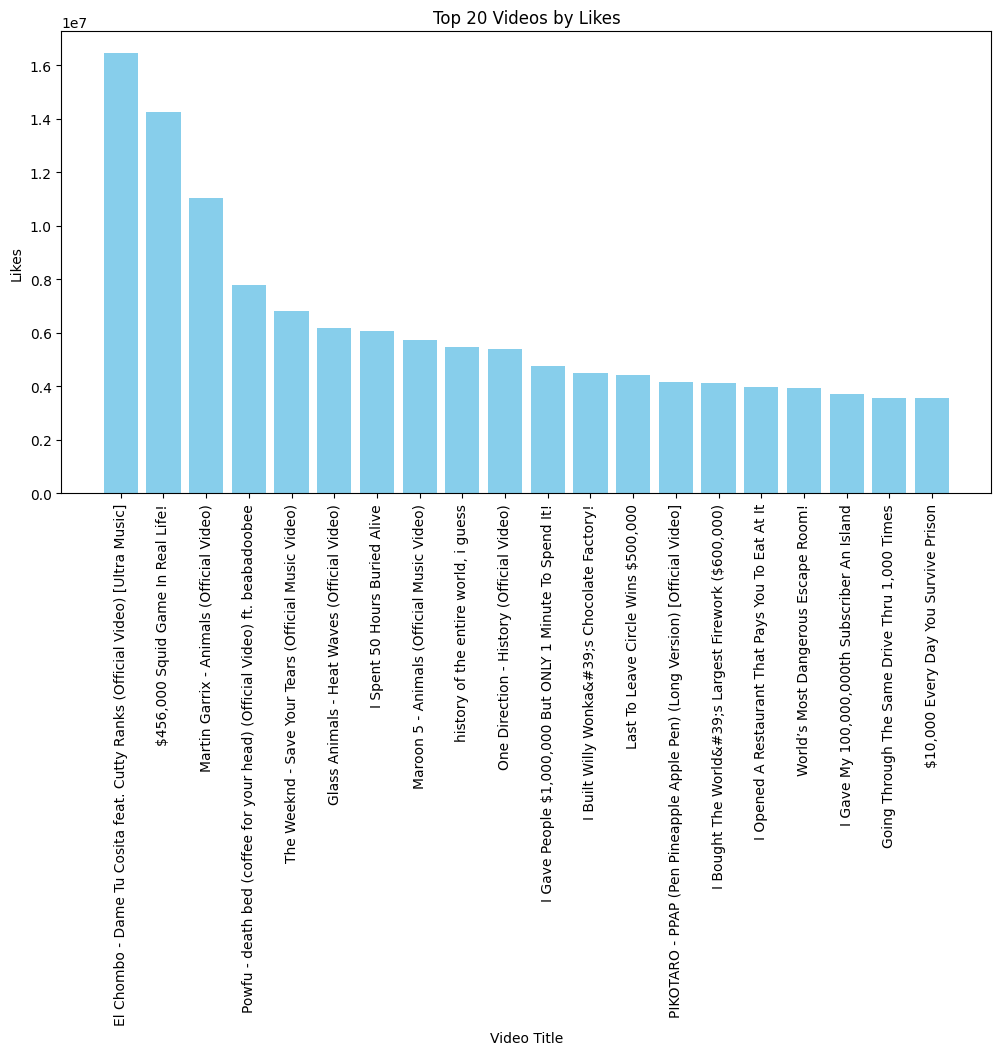

<ipython-input-595-3ac01c057f6b>:33: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


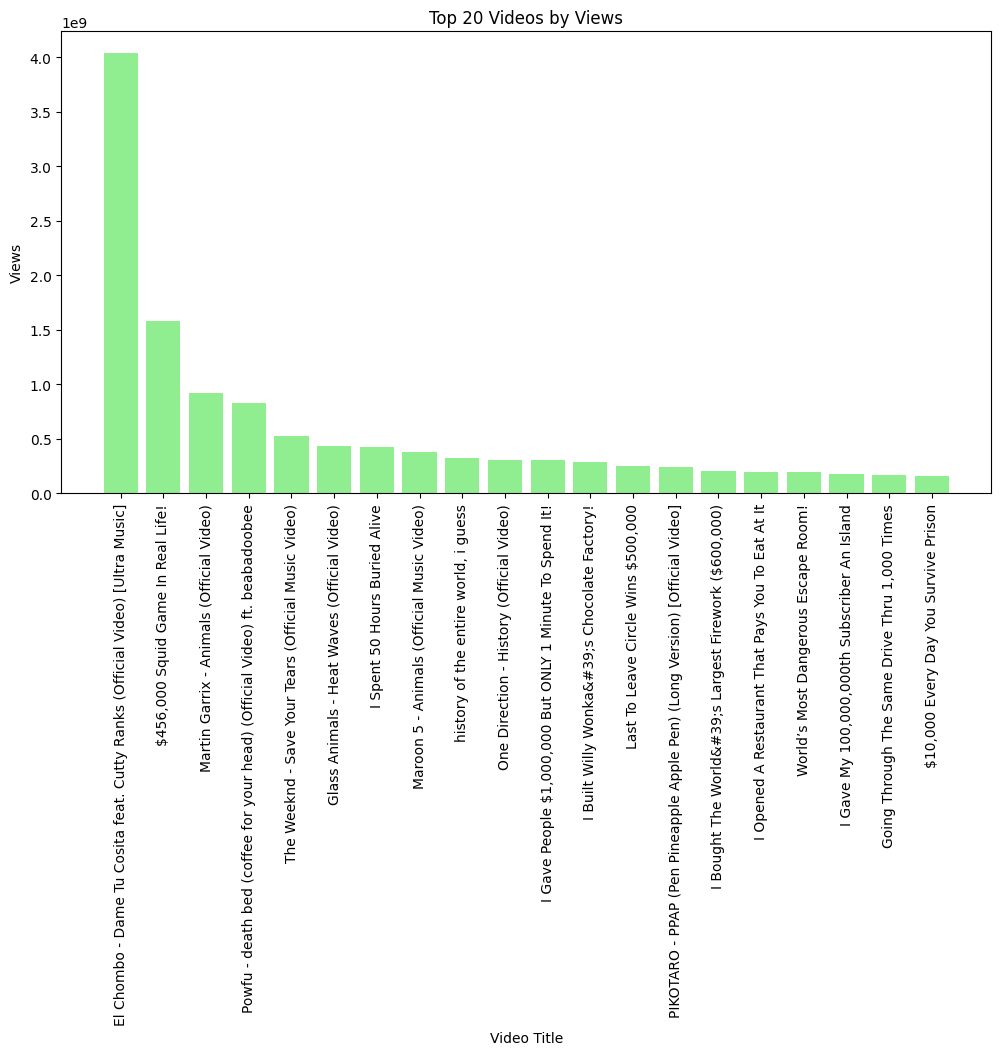

In [595]:
import matplotlib.pyplot as plt

likes = [row.Most_Liked for row in result1.collect()]
views = [row.Views for row in result1.collect()]
titles = [row.Title for row in result1.collect()]

# Sort the videos based on likes and views
sorted_indices_likes = sorted(range(len(likes)), key=lambda k: likes[k], reverse=True)[:20]
sorted_indices_views = sorted(range(len(views)), key=lambda k: views[k], reverse=True)[:20]

# Get the top 20 videos and their corresponding likes and views
top_videos_likes = [likes[idx] for idx in sorted_indices_likes]
top_videos_views = [views[idx] for idx in sorted_indices_views]
top_videos_titles = [titles[idx] for idx in sorted_indices_likes]

# Plotting the bar chart for the top 20 videos based on likes
plt.figure(figsize=(12, 6))
plt.bar(top_videos_titles, top_videos_likes, color='skyblue')
plt.xlabel('Video Title')
plt.ylabel('Likes')
plt.title('Top 20 Videos by Likes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plotting the bar chart for the top 20 videos based on views
plt.figure(figsize=(12, 6))
plt.bar(top_videos_titles, top_videos_views, color='lightgreen')
plt.xlabel('Video Title')
plt.ylabel('Views')
plt.title('Top 20 Videos by Views')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
